In [1]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

In [2]:
TOTAL_IMG_FOLDER = "C:/Users/PC/Desktop/myz/odev_3/faces/"

train_set_files = os.listdir(TOTAL_IMG_FOLDER)

width  = 168
height = 192

Görseller:
(10, 32256)


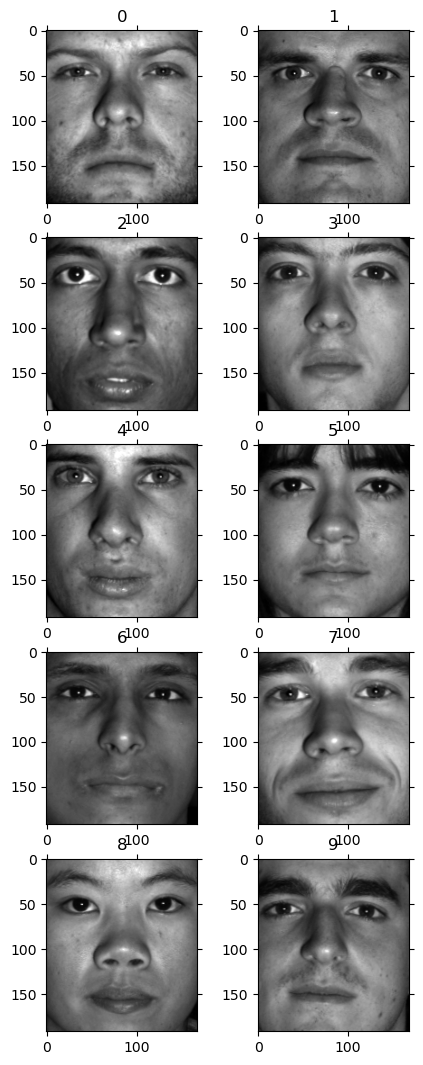

In [3]:
print('Görseller:')
train_image_names = os.listdir(TOTAL_IMG_FOLDER)
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

print(training_tensor.shape)
fig, axes = plt.subplots(5,2, figsize=(5,13))
for i in range(len(train_image_names)):
    img = plt.imread(TOTAL_IMG_FOLDER + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    row = i // 2
    col = i % 2
    axes[row,col].set_title(i)
    axes[row,col].imshow(img, cmap='gray')
    axes[row,col].tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()



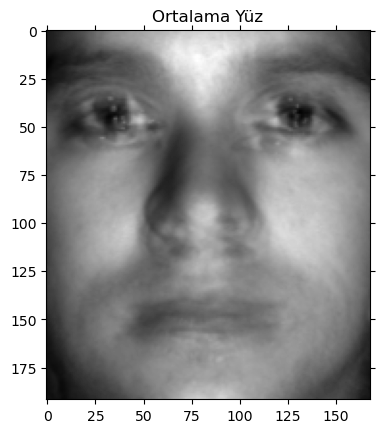

In [4]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.title("Ortalama Yüz")
plt.show()

In [5]:
#X - Xmean kısmı

normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

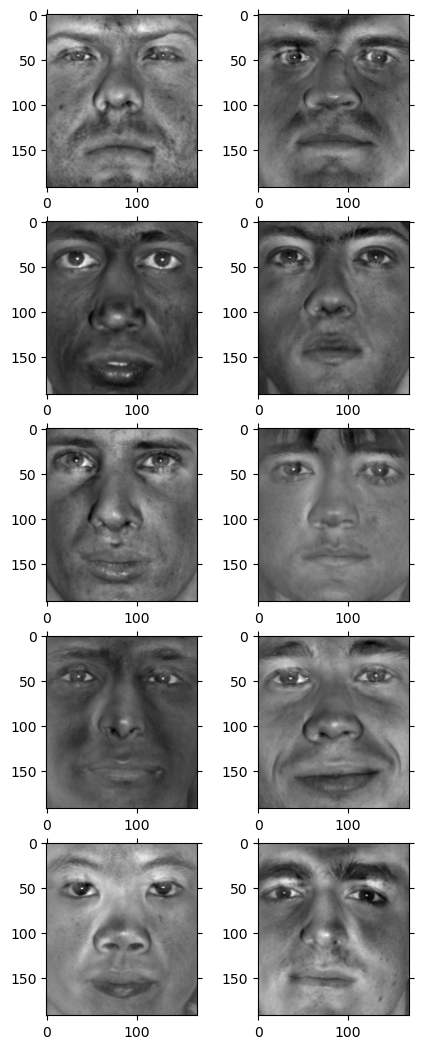

In [6]:
fig,axes = plt.subplots(5,2, figsize=(5,13))
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    row = i // 2
    col = i % 2

    axes[row,col].imshow(img, cmap='gray')
    axes[row,col].tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
cov_matrix=np.cov(training_tensor)

print('Covariance Matrix Shape:', cov_matrix.shape)


Covariance Matrix Shape: (10, 10)


In [39]:
print(cov_matrix)

[[1416.25735111  568.10190202  731.88579292  899.7391961   950.24536766
   762.36179494  555.15156896  882.26556686  839.04786997  551.04867764]
 [ 568.10190202  759.17595188  334.43233388  624.75227412  556.3327408
   495.64510399  318.25338835  530.11002198  344.95788131  436.0445504 ]
 [ 731.88579292  334.43233388 1471.05848123  973.13609809 1065.52855177
   755.84401598  492.05552957  877.65621935  701.97792132  391.0278583 ]
 [ 899.7391961   624.75227412  973.13609809 1603.23662997 1129.45133217
  1070.94116849  482.19871945  929.79671592  618.72277043  584.75315014]
 [ 950.24536766  556.3327408  1065.52855177 1129.45133217 1823.52824561
   944.3684463   587.08866268  972.67814489  789.47524731  733.99382353]
 [ 762.36179494  495.64510399  755.84401598 1070.94116849  944.3684463
  1864.85023238  579.58371398  990.3754344   821.16314712  538.7677501 ]
 [ 555.15156896  318.25338835  492.05552957  482.19871945  587.08866268
   579.58371398  684.17031353  522.14434624  516.48325739  4

In [44]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Özdeğer boyutları: {} Özvektör boyutları: {}\n'.format(eigenvalues.shape, eigenvectors.shape))

print("Özdeğerler:\n", eigenvalues,"\n")
print("Özvektörler:\n",eigenvectors)

Özdeğer boyutları: (10,) Özvektör boyutları: (10, 10)

Özdeğerler:
 [7865.34977518 1182.82313322  998.38729992 1029.56243569  763.6354239
  648.25725594  277.0216401   364.94676379  417.60376188  518.46780265] 

Özvektörler:
 [[ 0.33333188 -0.03767364 -0.38789166 -0.04385294 -0.37126552  0.44958567
  -0.14037141  0.43713145  0.4293401   0.00110012]
 [ 0.19590095 -0.20928126  0.02233181 -0.12531673 -0.41555627  0.16971051
  -0.46332797 -0.67604635 -0.16320189 -0.04226327]
 [ 0.32663567  0.14826655  0.02961859  0.5696421   0.29576947 -0.09953608
  -0.34916078 -0.10314312  0.19385646  0.52767196]
 [ 0.37266824 -0.10222196  0.41583535  0.18050091 -0.175984    0.39581756
   0.45249298  0.1072553  -0.43269371  0.23248672]
 [ 0.39917583 -0.24869891 -0.0083792   0.38790673  0.25423159 -0.06407518
  -0.00168202 -0.00162006 -0.00972933 -0.74794801]
 [ 0.36887502  0.25966532  0.54189047 -0.5553575   0.28865077  0.04522384
  -0.21990045  0.08663108  0.21163551 -0.09177528]
 [ 0.20432589 -0.0256547

In [ ]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

sorted_ind = sorted(range(eigenvalues.shape[0]), key=lambda k: eigenvalues[k], reverse=True)

eigvalues_sort = eigenvalues[sorted_ind]
eigvectors_sort = eigenvectors[sorted_ind]


Cumulative proportion of variance explained vector: 
[0.55917239 0.643263   0.71645782 0.78743631 0.84172555 0.88781219
 0.92467169 0.95436045 0.98030566 1.        ]


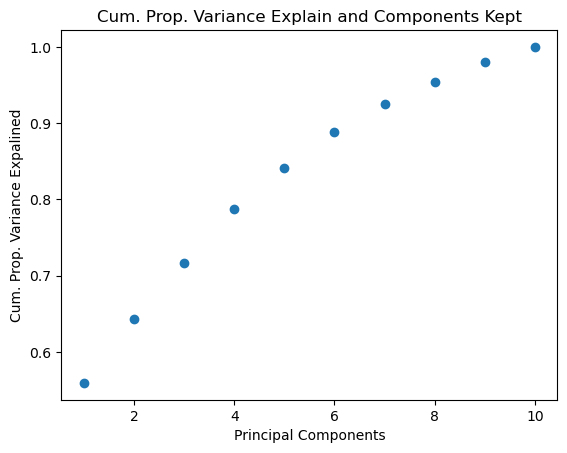

In [ ]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()



In [32]:
reduced_data = np.array(eigvectors_sort[:5]).transpose()
print(reduced_data.shape)
print(training_tensor.transpose().shape, reduced_data.shape)

(10, 5)
(32256, 10) (10, 5)


In [33]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()
proj_data.shape

(5, 32256)

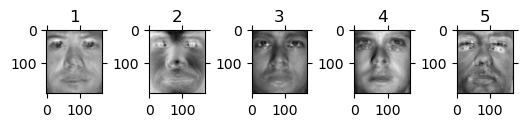

In [34]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(5,5,1+i)
    plt.title(f"{i+1}")
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')

plt.show()

In [47]:

k = 10 

eigenfaces = np.dot(normalised_training_tensor.T, eigvectors_sort[:k].T)  

for i in range(eigenfaces.shape[1]):
    eigenfaces[:, i] /= np.linalg.norm(eigenfaces[:, i])

W = eigenfaces


In [51]:
X_centered = training_tensor - mean_face
train_projections = np.dot(X_centered, W)  


print(X_centered.shape)
print(train_projections.shape)

(10, 32256)
(10, 10)


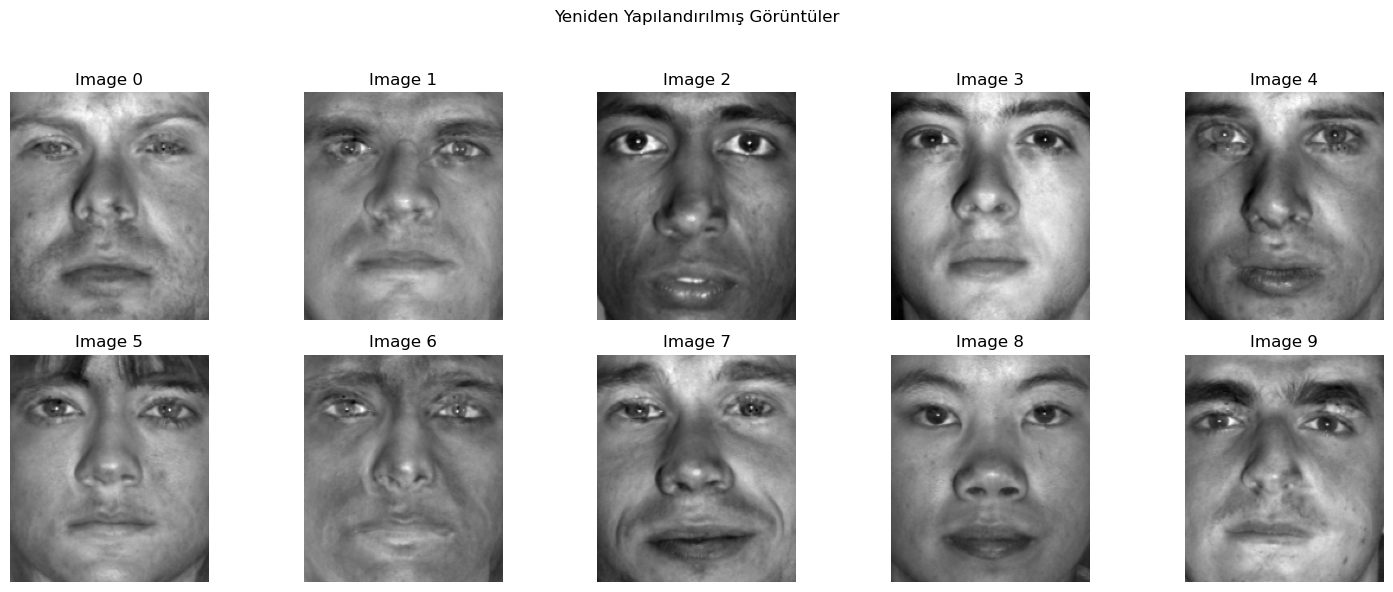

In [ ]:
# Yeniden yapılandırılmış görüntüleri saklamak için liste
reconstructed_images = []  

#öklid uzaklığı oluşturmak için kullanılan liste
reconstruction_errors = []

num_images = train_projections.shape[0]

# Her bir görüntü için yeniden yapılandırma işlemi:
for i in range(num_images):

    # Proje katsayıları (shape: (k,))
    proj_coeff = train_projections[i]

    recon_vector = mean_face + np.dot(W, proj_coeff)
    recon_image = recon_vector.reshape(height, width)
    reconstructed_images.append(recon_image)

    error = np.linalg.norm(training_tensor[i] - recon_vector)
    reconstruction_errors.append(error)

# Görselleştirme (örneğin 2 satır 5 sütunluk grid şeklinde)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
for i, ax in enumerate(axes):
    if i < num_images:
        ax.imshow(reconstructed_images[i], cmap='gray')
        ax.set_title(f"Image {i}")
    ax.axis('off')
plt.suptitle("Yeniden Yapılandırılmış Görüntüler")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [53]:
print(reconstruction_errors)

[8098.306258001109, 4150.792848123523, 3371.824131233844, 1405.5784608237307, 5040.240870054061, 6225.909598406936, 9975.40388748064, 9018.081813486822, 3130.7024786204047, 3047.0141857002523]
